## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [2]:
# Get your import statement here

import math 
import statistics 
import numpy as np 
import scipy.stats 
import pandas as pd

import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
import seaborn as sns

from scipy.stats import uniform
from scipy.stats import norm

In [3]:
# Load your dataset here
missing_value = ['n/a', 'na', '-', ' ', ' - ']
df =  pd.read_csv('dataset/nyc-rolling-sales.csv',na_values=missing_value)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [4]:
# Write your syntax here
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [5]:
# Write your syntax here
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,NaN,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [6]:
# Write your syntax here
df.shape

(84548, 22)

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [7]:
# Drop 'Unnamed: 0' , 'EASE-MENT' ,'LAND SQUARE FEET','GROSS SQUARE FEET' features using .drop function

df.drop(['Unnamed: 0', 'EASE-MENT','LAND SQUARE FEET','GROSS SQUARE FEET'], inplace=True, axis=1)




Let's view Dtype of each features in dataframe using `.info()` function.

In [8]:
# drop baris data yang tidak punya sale price
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19052 entries, 73 to 84416
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         19052 non-null  int64 
 1   NEIGHBORHOOD                    19052 non-null  object
 2   BUILDING CLASS CATEGORY         19052 non-null  object
 3   TAX CLASS AT PRESENT            19052 non-null  object
 4   BLOCK                           19052 non-null  int64 
 5   LOT                             19052 non-null  int64 
 6   BUILDING CLASS AT PRESENT       19052 non-null  object
 7   ADDRESS                         19052 non-null  object
 8   APARTMENT NUMBER                19052 non-null  object
 9   ZIP CODE                        19052 non-null  int64 
 10  RESIDENTIAL UNITS               19052 non-null  int64 
 11  COMMERCIAL UNITS                19052 non-null  int64 
 12  TOTAL UNITS                     19052 non-nul

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [10]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 188
BUILDING CLASS CATEGORY 31
TAX CLASS AT PRESENT 9
BUILDING CLASS AT PRESENT 57
ADDRESS 6253
APARTMENT NUMBER 3988
BUILDING CLASS AT TIME OF SALE 57
SALE PRICE 5017
SALE DATE 325


In [11]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = [ 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [12]:
# coba cari rata2 harga rumah di Bronx
df_bronx = df[df['BOROUGH'] == 2]

In [13]:
# data harga jual rumah2 manhattan sudah kita rapikan (tidak ada missing values)
# kita perlu cek juga invalid data
df_bronx['SALE PRICE'].describe()


count    6.360000e+02
mean     3.116176e+05
std      1.549472e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.202505e+05
75%      2.057500e+05
max      2.800000e+07
Name: SALE PRICE, dtype: float64

In [14]:
# kita hapus juga harga rumah yang dijual $1, $10, dan angka rendah lainnya
df_bronx_filtered = df_bronx[df_bronx['SALE PRICE'] > 100000]
print(df_bronx_filtered['SALE PRICE'].min())
df_bronx_filtered.info()

102000.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 18746 to 25174
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         390 non-null    int64         
 1   NEIGHBORHOOD                    390 non-null    category      
 2   BUILDING CLASS CATEGORY         390 non-null    category      
 3   TAX CLASS AT PRESENT            390 non-null    category      
 4   BLOCK                           390 non-null    int64         
 5   LOT                             390 non-null    int64         
 6   BUILDING CLASS AT PRESENT       390 non-null    category      
 7   ADDRESS                         390 non-null    object        
 8   APARTMENT NUMBER                390 non-null    object        
 9   ZIP CODE                        390 non-null    int64         
 10  RESIDENTIAL UNITS               390 non-null    int64      

## Exploratory data analysis

In [15]:
df_bronx_filtered['SALE PRICE'].describe()

count    3.900000e+02
mean     5.014550e+05
std      1.955820e+06
min      1.020000e+05
25%      1.266510e+05
50%      1.765000e+05
75%      3.190575e+05
max      2.800000e+07
Name: SALE PRICE, dtype: float64

In [16]:
# dari data yang sudah di filter, kita cari mean dari SALE PRICE nya
df_bronx_filtered['SALE PRICE'].mean()

501454.95384615386

In [17]:
# dari data yang sudah di filter, kita cari median dari SALE PRICE nya
df_bronx_filtered['SALE PRICE'].median()

176500.0

In [18]:
# dari data yang sudah di filter, kita cari mode
df_bronx_filtered['SALE PRICE'].mode()

0    125000.0
Name: SALE PRICE, dtype: float64

In [19]:
# dari data yang sudah di filter, kita cari range
np.ptp(df_bronx_filtered['SALE PRICE'])

27898000.0

In [20]:
# dari data yang sudah di filter, kita cari variance
df_bronx_filtered['SALE PRICE'].var(ddof=0)

3815424479760.6543

In [21]:
# dari data yang sudah di filter, kita cari SD
df_bronx_filtered['SALE PRICE'].std(ddof=0)

1953311.1579471035

## Probability Distribution 

    Total Units dari apartment dengan building category ELEVATOR APT; FIREPROOF WITHOUT STORES dan ELEVATOR APT; SEMI-FIREPROOF WITH STORES di seluruh borough dalam data nyc-rolling-sales
    
 - Uniform
 - Normal
 

In [22]:
n = df['TOTAL UNITS'].sum()

start = 10
width = 20 
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
data_normal = norm.rvs(size=n, loc = start, scale=width)

C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

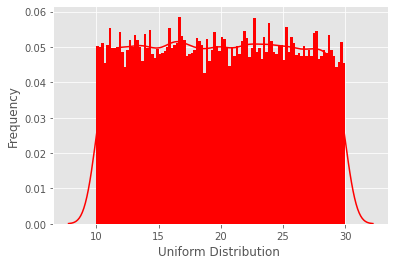

In [23]:
ax = sns.distplot(
        data_uniform, 
        bins=100, 
        kde=True, 
        color='red', 
        hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')



C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution '), Text(0, 0.5, 'Frequency')]

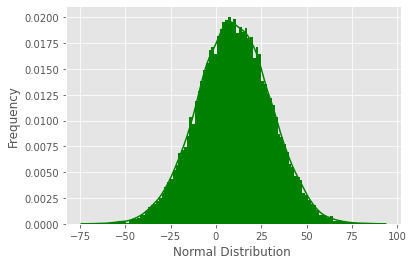

In [24]:
ax = sns.distplot(
        data_normal, 
        bins=100, 
        kde=True, 
        color='green', 
        hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution ', ylabel='Frequency')


## Confidence Interval

In [26]:
be = df_bronx_filtered["SALE PRICE"].mean()
z = 1.64 # level yakin di 90%
se = df_bronx_filtered["SALE PRICE"].std() / np.sqrt(len(df_bronx_filtered["SALE PRICE"]))
me = z * se

print("Confidence Interval")
print(be - me)
print(be + me)

Confidence Interval
339034.590280869
663875.3174114388


rata2 sale price  di Bronx ada di antara 339034 - 663875 USD. berdasarkan data kita, di level keyakinan 90%

## Hypothesis Testing

kurang dari 50% rumah di NYC rata2 ada di atas 500rb USD

proportion, one sided

H0: p == 0.5

note: hypothesis testing hanya mengecek apakah ada perbedaan yang *signifikan* antara p dengan 0.5

H1: p < 0.5

note: statement yang kita buat mau mengecek apakah proporsi x ada di bawah 50%

In [33]:
# cari proporsinya p

diatas2 = len(df_bronx_filtered["SALE PRICE"][df_bronx_filtered["SALE PRICE"] > 500000])
diatas2

50

In [34]:
# jumlah unit berapa
n = len(df_bronx_filtered["SALE PRICE"])
n

390

In [35]:
p = diatas2/ n
p

0.1282051282051282

In [32]:
phat = p 
pnull = 0.5 # yang mau kita cek apakah beda signifikan dari angka ini

zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='smaller')
print(pvalue)

4.582498081716985e-177


- 50 unit yg harga jual nya diatas 500rb USD
- 390 unit dari semua total perumahan di Bronx
- p nya ada di 13%, berbeda signifikan dengan 50%

In [36]:
sigma = 0.05

if (pvalue < sigma):
    print("reject null hypothesis, bisa accept alternate hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis, bisa accept alternate hypothesis
